 * Ori Nissim
 * ID: 315903518
 * Kaggle profile: https://www.kaggle.com/orinissim 
 

# Machine Learning 2022 Exercise 2
#### Kaggle's competition  House Prices - Advanced Regression Techniques

Topics:
* EDA – Essential Data Analysis for Regression
* Linear Regression
* Cross Validation: LPOCV, K-Fold and LOO
* Regularization: Lasso Ridge and Elastic Net
* Feature Selection 

### Let's start by loading the dataset and importing neccessary modules

In [17]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [18]:
!pip install opendatasets
import opendatasets as od


In [19]:

od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")


Skipping, found downloaded files in "./house-prices-advanced-regression-techniques" (use force=True to force download)


In [20]:
{"username":"orinissim","key":"0aa1b75ca38d002788da27cf76386715"}

{'key': '0aa1b75ca38d002788da27cf76386715', 'username': 'orinissim'}

In [21]:
df = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# First look at the data

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# What about missing values ? 
### we should take a look before putting any effort

In [24]:
pd.set_option('display.max_rows', None)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'], ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


# Visualization of the data
 We shall look specificly much closer at these features with high rate of missing values: 
* PoolQC	---	99.520548
* MiscFeature	---	96.301370
* Alley	---	93.767123
* Fence	---	80.753425
* FireplaceQu	---	47.260274

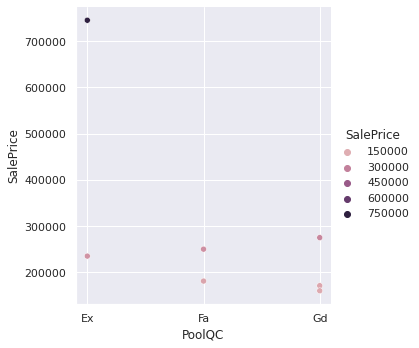

In [25]:
sns.set_theme()

sns.relplot(
    data=df,
    x="PoolQC", y="SalePrice",
    hue="SalePrice"
)

# Clearly this feature (PoolQC) does not represent any data correctly consider the tiny amount of samples and an ***outlier***

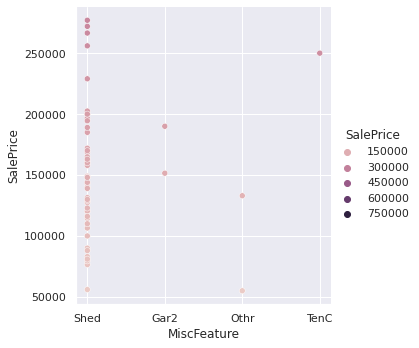

In [26]:

sns.relplot(
    data=df,
    x="MiscFeature", y="SalePrice",
    hue="SalePrice"
)

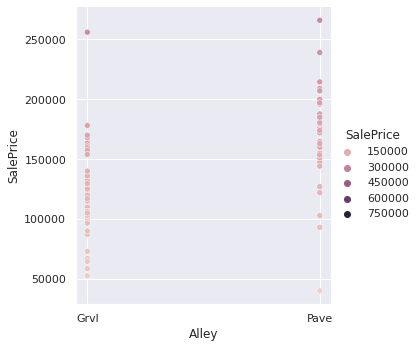

In [27]:

sns.relplot(
    data=df,
    x="Alley", y="SalePrice",
    hue="SalePrice"
)

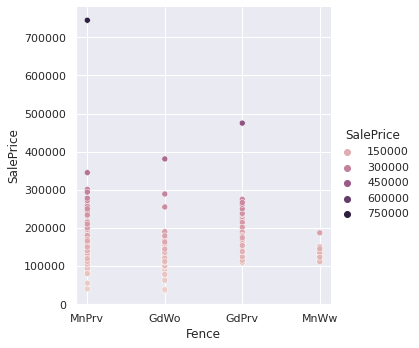

In [28]:

sns.relplot(
    data=df,
    x="Fence", y="SalePrice",
    hue="SalePrice"
)

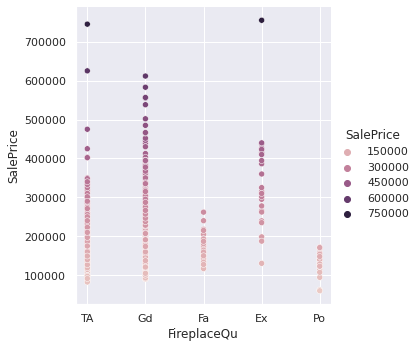

In [29]:

sns.relplot(
    data=df,
    x="FireplaceQu", y="SalePrice",
    hue="SalePrice"
)

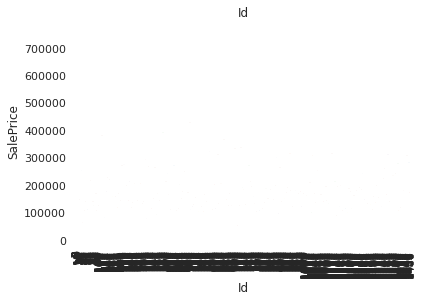

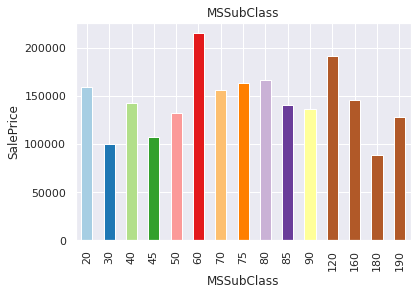

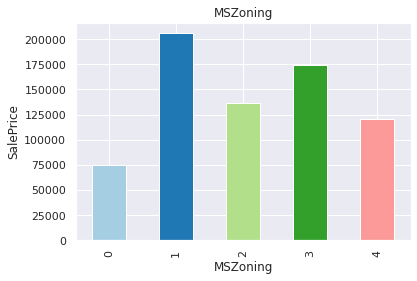

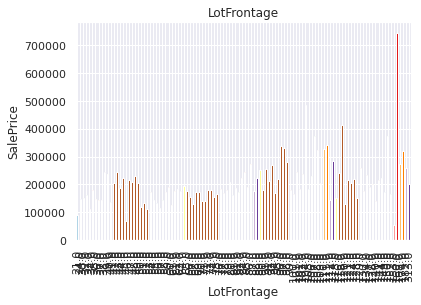

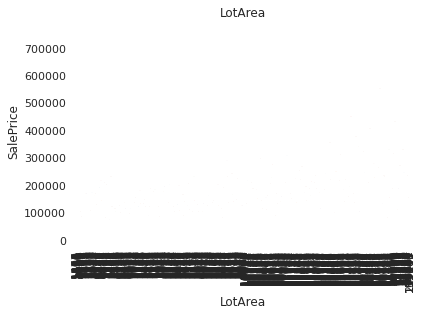

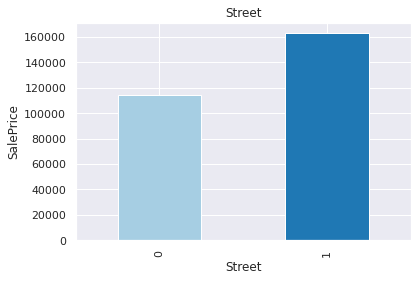

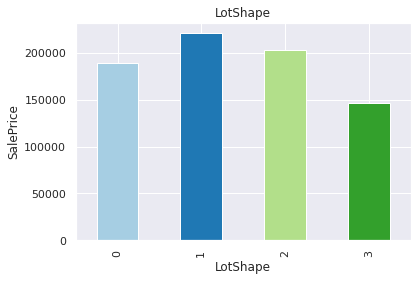

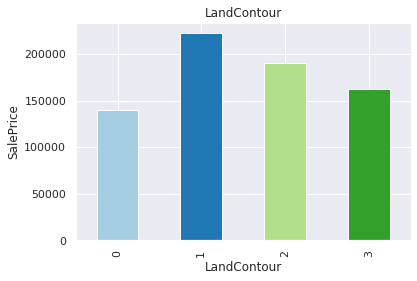

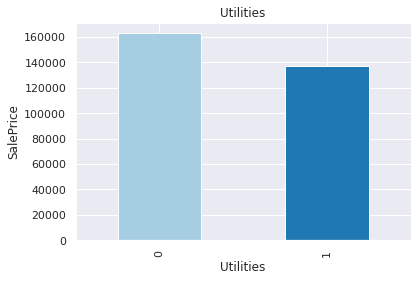

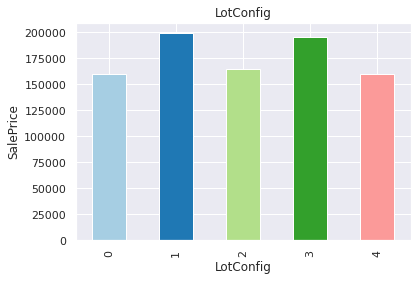

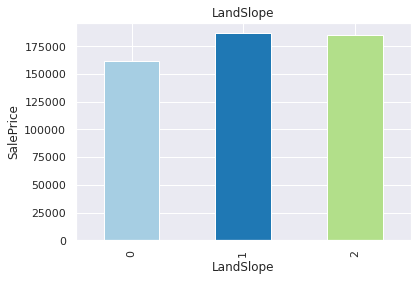

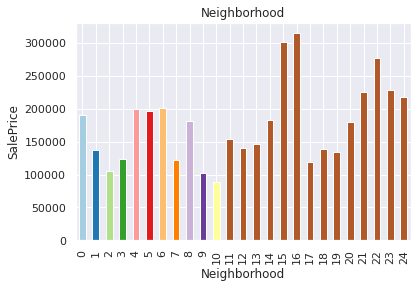

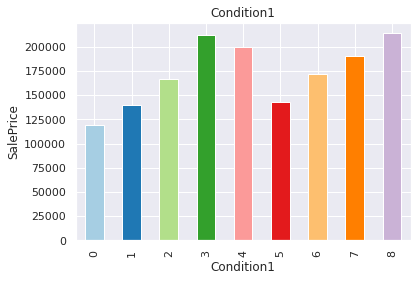

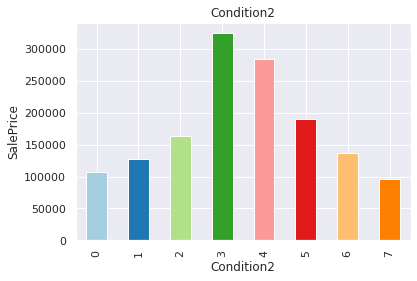

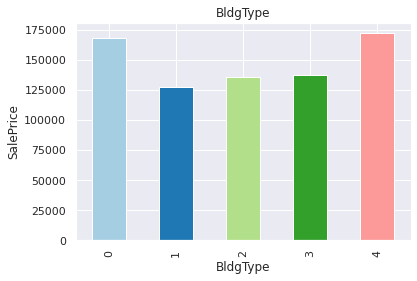

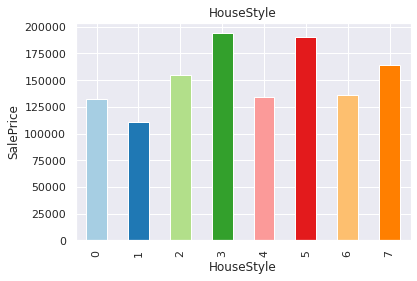

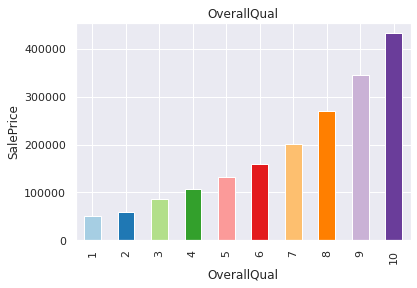

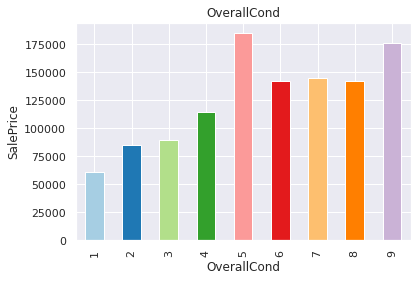

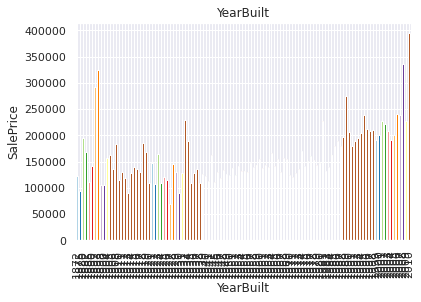

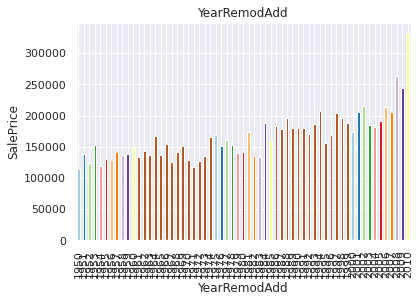

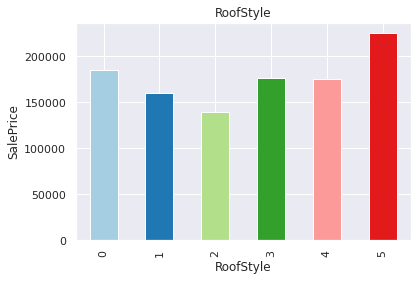

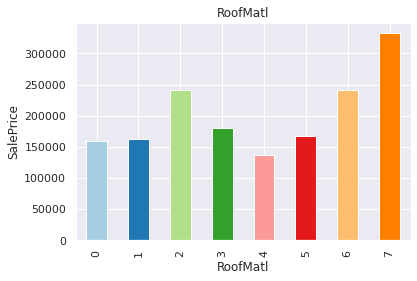

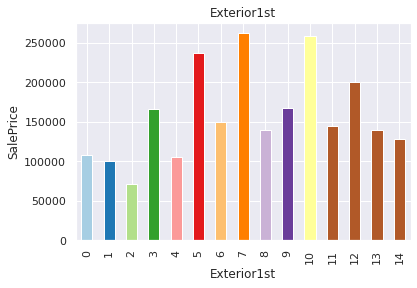

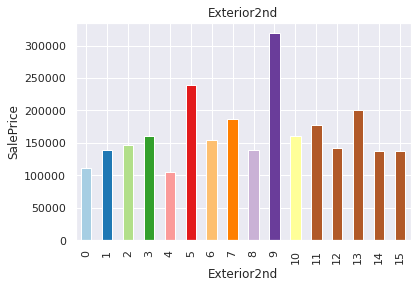

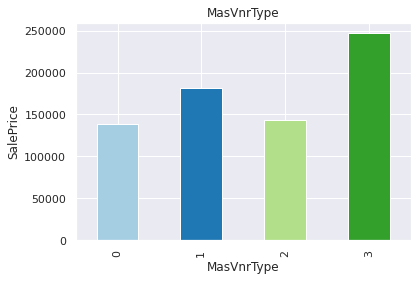

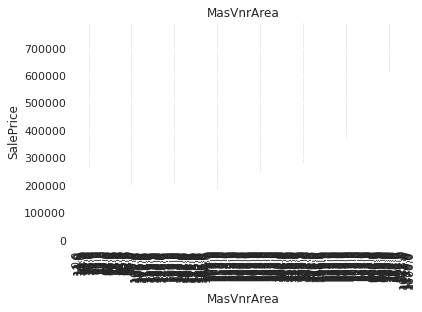

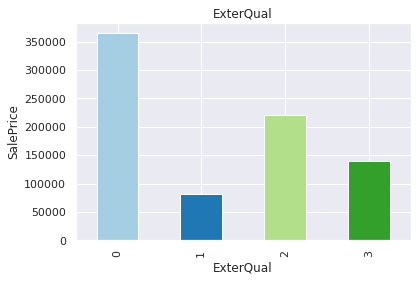

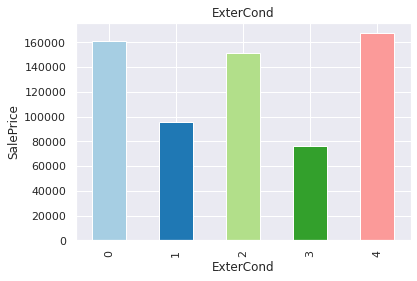

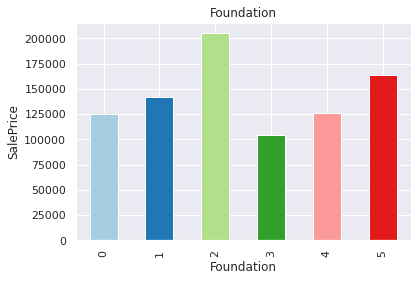

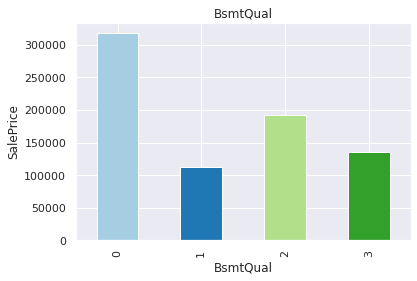

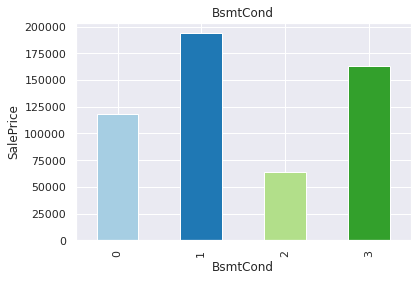

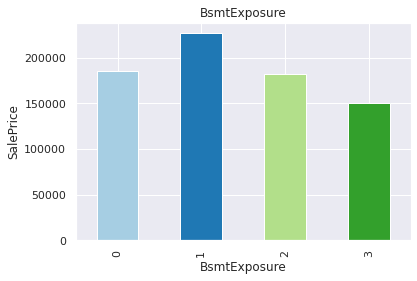

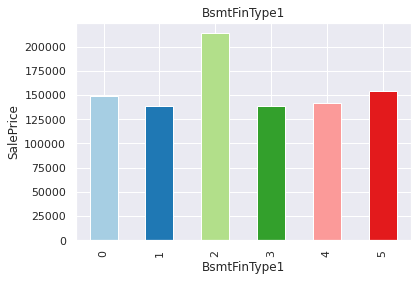

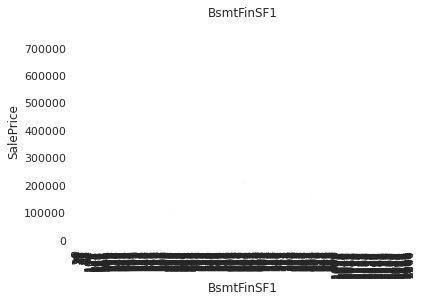

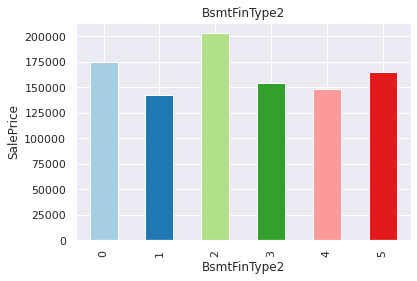

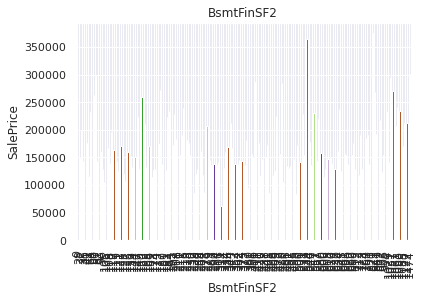

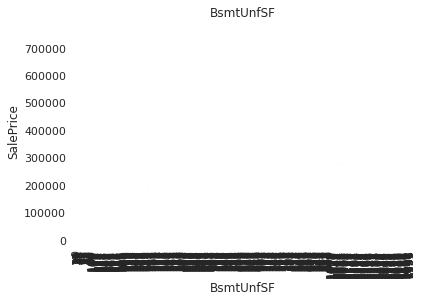

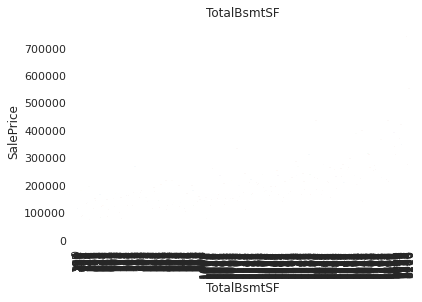

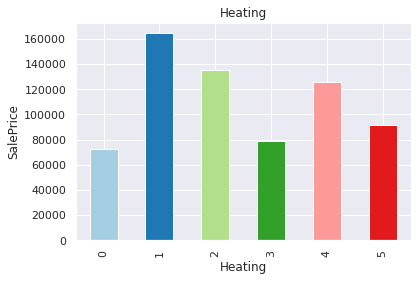

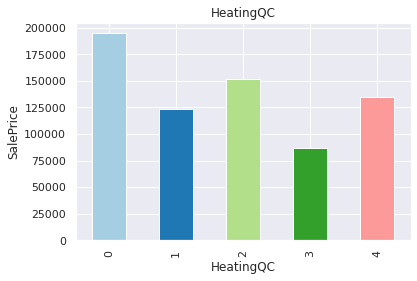

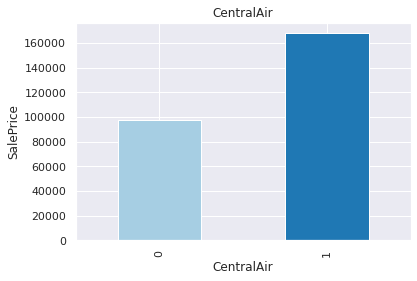

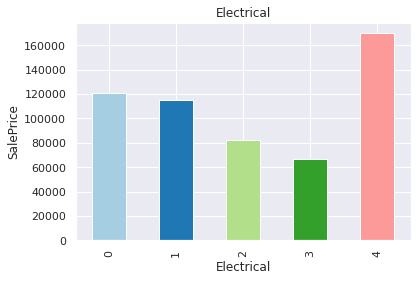

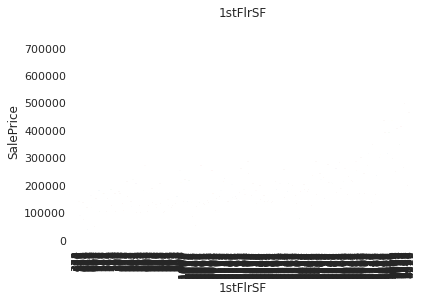

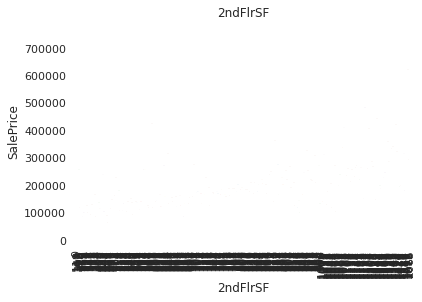

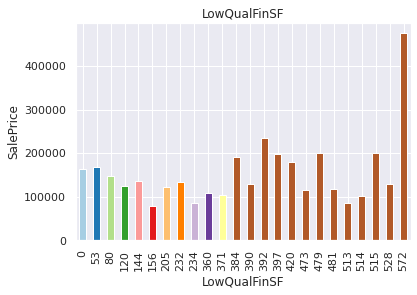

In [ ]:
for feature in df:
    N=25
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=plt.cm.Paired(np.arange(N)))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature engineering
### We'll handle:
* Missing values
* Drop unnecessary features
* Consider adding new features

## Fill missing values with medians

Text(0.5, 1.0, 'Missing values heatmap')

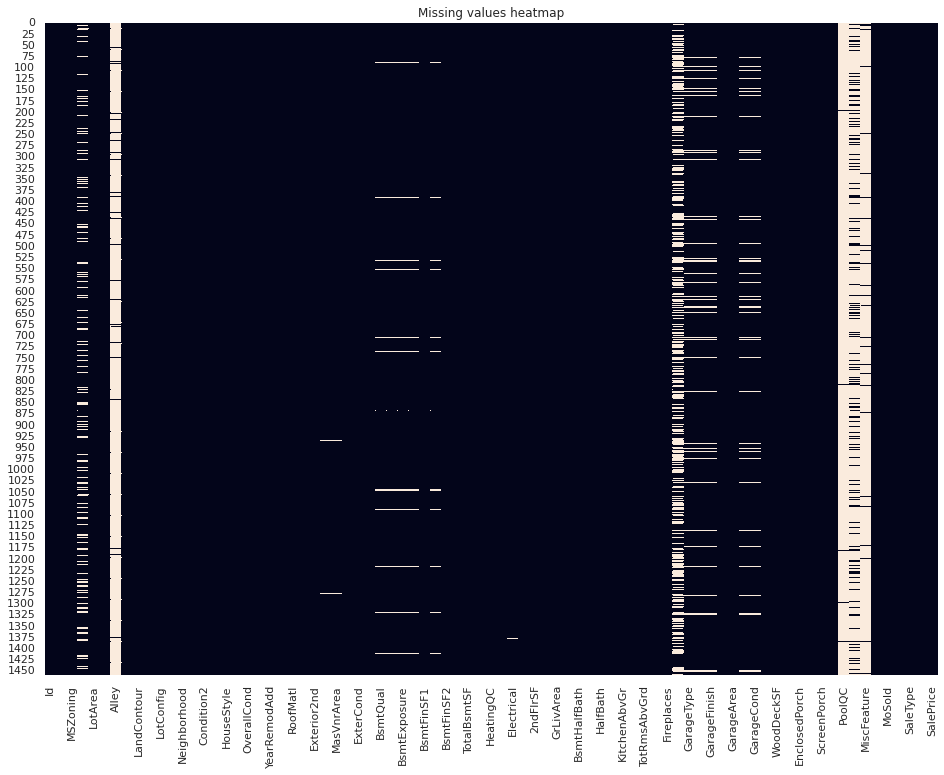

In [31]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")


# Drop features with high rate of missing values

In [32]:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)


# Fill each group of features according to its type
### Numeric features:

(1460, 77)


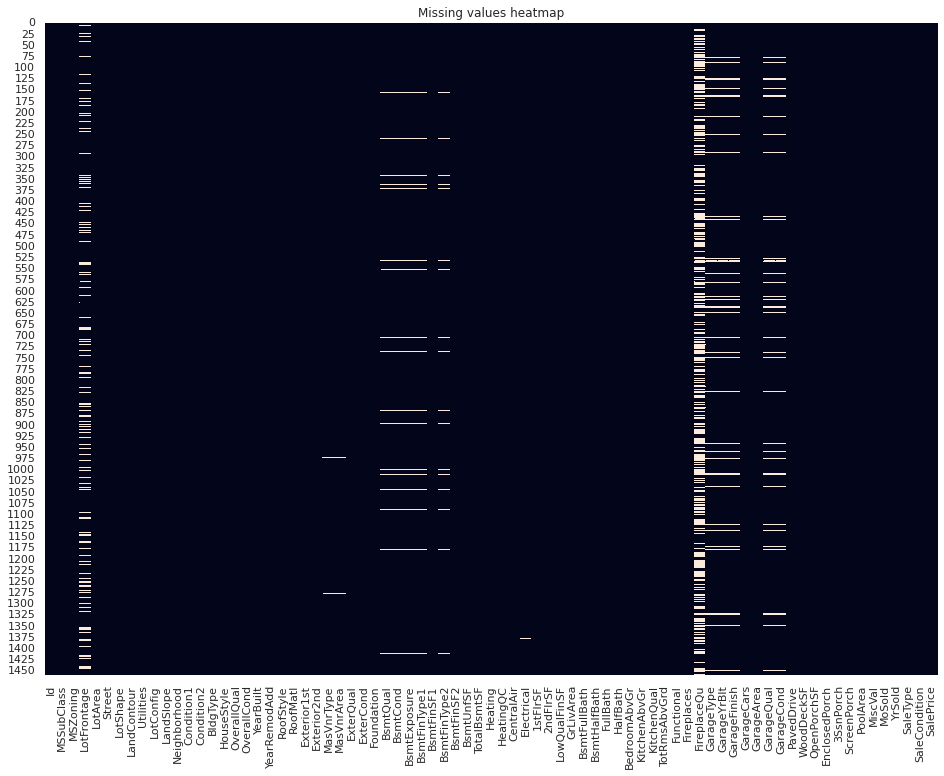

In [33]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")
print(df.shape)

# Split data to apropriate types so we can fill missing values

In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols.shape, categorical_cols.shape)

(38,) (39,)


In [34]:
for column in numerical_cols:
  median = df[column].median()
  df[column] = df[column].fillna(median)

In [36]:
for column in categorical_cols:
  df[column] = df[column].fillna(df[column].mode()[0])

(1460, 77)


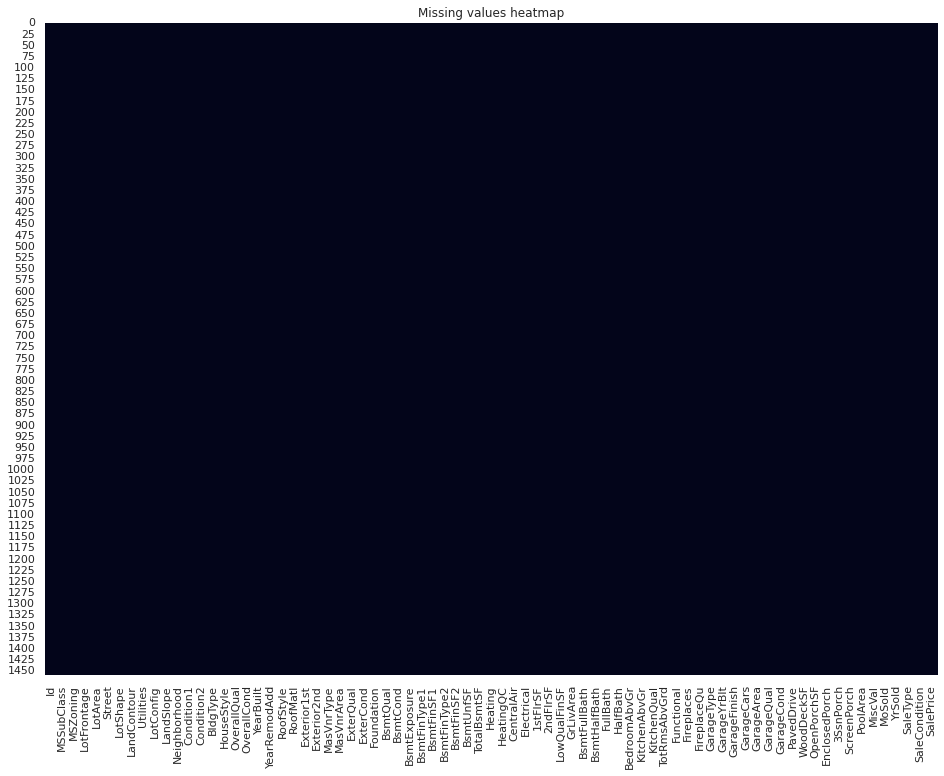

In [37]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")
print(df.shape)

# No Missing values! Let's continue


## Apply dummy encoding for categorical features

In [38]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
for col in categorical_cols:
  # Encode labels in column 'species'.
  df[col]= label_encoder.fit_transform(df[col])
 
  df[col].unique()

# divide the data to features and target


In [ ]:
t = df['SalePrice'].copy()
X = df.drop(['SalePrice'], axis=1)


# Data Splitting

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# CV is K-fold with 10 folds, check it on each of the Regularizatrion algorithms

In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [42]:
# print lasso, ridge and elasticnet scores as classification 
sgd_lasso =SGDRegressor(penalty='l1', random_state=42)
sgd_ridge = SGDRegressor(penalty='l2', random_state=42)
sgd_elastic = SGDRegressor(penalty='elasticnet', random_state=42)


In [43]:

print("Accuracy score:")
print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso), X, t, cv=15).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), X, t, cv=15).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic), X, t, cv=15).mean())

Accuracy score:
sgd_lasso 0.7860487930087217
sgd_ridge 0.7860681769597749
sgd_elastic 0.7860652707315646


### Results are very close


# Feature Selection:
### forward selection

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector


In [45]:
sfs = SequentialFeatureSelector(sgd_ridge,direction='forward', cv=5)


In [46]:
new_x = sfs.fit_transform(X,t)  ## train the model and get features out to new x

In [47]:
features = sfs.get_feature_names_out()
print(features)

['Street' 'LotShape' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'MasVnrType' 'ExterQual' 'ExterCond'
 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'Heating' 'HeatingQC' 'CentralAir' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageCars'
 'PavedDrive']


# Let us test the features we got!

In [48]:
new_x = df[features]

In [49]:
print('sgd_ridge after forward features selection', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), new_x, t, cv=5).mean())


sgd_ridge after forward features selection 0.8011682088513478


## We got a better score!

#### Backward selection

In [50]:
sfs_backward = SequentialFeatureSelector(sgd_ridge,direction='backward', cv=5)


In [51]:
new_x_backwards = sfs_backward.fit(X,t)

In [52]:
features_backward_selection = sfs_backward.get_feature_names_out()
print(features_backward_selection)

['MSZoning' 'LotFrontage' 'LotShape' 'LandContour' 'LotConfig'
 'Neighborhood' 'Condition2' 'BldgType' 'OverallQual' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'ExterCond'
 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'HeatingQC' 'Electrical' 'BsmtFullBath' 'FullBath' 'HalfBath'
 'KitchenQual' 'Functional' 'Fireplaces' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PavedDrive' 'OpenPorchSF' 'EnclosedPorch'
 'PoolArea' 'MoSold' 'SaleCondition']


In [53]:
new_x_backwards = df[features_backward_selection]

### Check the score

In [54]:
print('sgd_ridge after backward features selection', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), new_x_backwards, t, cv=5).mean())


sgd_ridge after backward features selection 0.7658682302098712


### we got a worse score..

### As for Hybrid feature selection - after a long time of searching i didnt find a way to implement it

## Summarize what we did so far:
* Ridge regulariztion gave us best score in regularization stage
* Forward feature selection gave us best score on feature selection stage

# Let us plot the graphs for different hyperparameters we used


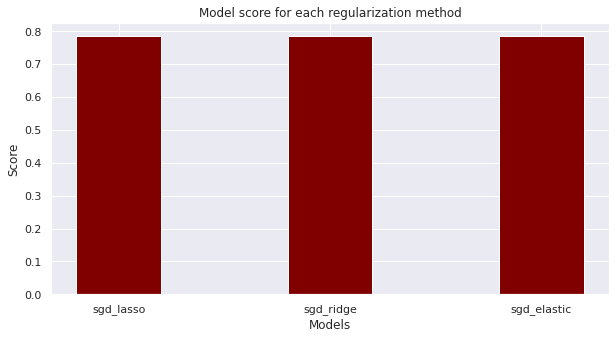

In [55]:

# creating the dataset
data = {'sgd_lasso':cross_val_score(make_pipeline(StandardScaler(), sgd_lasso), X, t, cv=15).mean(),\
'sgd_ridge': cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), X, t, cv=15).mean(),\
'sgd_elastic': cross_val_score(make_pipeline(StandardScaler(), sgd_elastic), X, t, cv=15).mean() }
models = list(data.keys())
score = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, score, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model score for each regularization method")
plt.show()

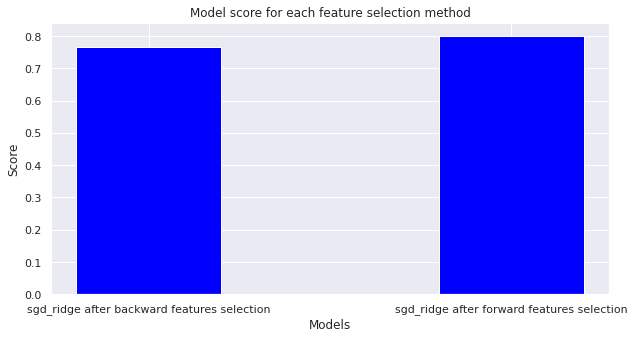

In [56]:

# creating the dataset
data = {'sgd_ridge after backward features selection':cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), new_x_backwards, t, cv=5).mean(),\
'sgd_ridge after forward features selection':cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), new_x, t, cv=5).mean() }
models = list(data.keys())
score = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, score, color ='blue',
        width = 0.4)
  
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model score for each feature selection method")
plt.show()

# Submit to the competition our final model - rigde with FFS

Text(0.5, 1.0, 'Missing values heatmap')

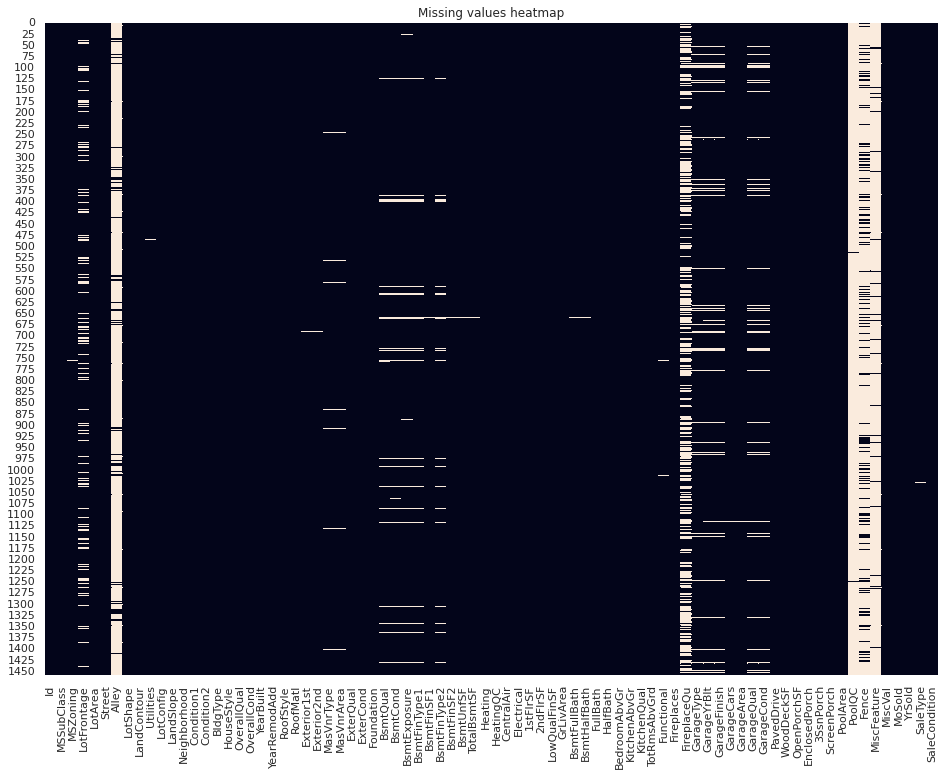

In [57]:
df_test = pd.read_csv('/content/house-prices-advanced-regression-techniques/test.csv') # read test df and test the model with best score (LR)

plt.figure(figsize=(16,12))

sns.heatmap(df_test.isnull(), cbar = False).set_title("Missing values heatmap")


## filling missing values like on training

(37,) (43,)


Text(0.5, 1.0, 'Missing values heatmap')

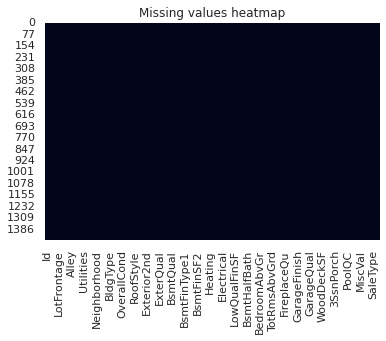

In [58]:
numerical_cols = df_test.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_test.select_dtypes(include=['object']).columns

print(numerical_cols.shape, categorical_cols.shape)

for column in categorical_cols:
  df_test[column] = df_test[column].fillna(df_test[column].mode()[0])

for column in numerical_cols:
  median = df_test[column].median()
  df_test[column] = df_test[column].fillna(median)


sns.heatmap(df_test.isnull(), cbar = False).set_title("Missing values heatmap")



# Label encoding so we can test it 

In [59]:
model = SGDRegressor(penalty='l2',random_state=42)
model.fit(new_x,t)
cross_val_score(make_pipeline(StandardScaler(), model), new_x, t, cv=15).mean()

0.8033311692206375

In [60]:

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
for col in categorical_cols:
  # Encode labels in column 'species'.
  df_test[col]= label_encoder.fit_transform(df_test[col])
 
  df_test[col].unique()

In [61]:
df_test_FFS = df_test[features] # use only the labels from the forward feature selection

In [62]:
df_test_FFS.head()

,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive
0,1,3,0,4,0,12,1,2,0,2,...,0,1,3,5,0,2,1,2,1.0,2
1,1,0,0,0,0,12,2,2,0,2,...,1,1,2,6,0,2,1,2,1.0,2
2,1,0,0,4,0,8,2,2,0,4,...,1,1,3,6,1,4,1,0,2.0,2
3,1,0,0,4,0,8,2,2,0,4,...,1,1,2,7,1,2,1,0,2.0,2
4,1,0,0,4,0,22,2,2,4,2,...,0,1,2,5,0,2,1,1,2.0,2


In [65]:
output = pd.DataFrame({'Id': df_test.Id,'SalePrice':model.predict(df_test_FFS)})
output.to_csv('submission.csv', index=False)

In [66]:
pd.read_csv('submission.csv').head()


,Id,SalePrice
0,1461,134618.307701
1,1462,202277.602167
2,1463,191588.719275
3,1464,227785.127252
4,1465,252350.561546


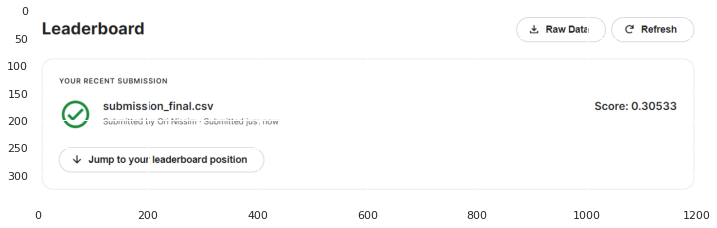

In [69]:
score = plt.imread('score_ml2.png')
plt.figure(figsize=(12,15))
plt.imshow(score)